<a href="https://colab.research.google.com/github/Davron030901/OpenCv/blob/main/11_Contours_Drawing%2C_Hierarchy_and_Modes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Contours**

####**In this lesson we'll learn:**
1. Using findContours
2. Drawing Contours
3. Hierachy of Contours
4. Contouring Modes (Simple vs Approx)

In [ ]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2024-11-14 12:20:42--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.149.50, 3.5.246.2, 3.5.244.254, ...
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.149.50|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-11-14 12:20:43 ERROR 404: Not Found.

unzip:  cannot find or open images.zip, images.zip.zip or images.zip.ZIP.


## **What are Contours?**
Contours are continous lines or curves that bound or cover the full boundary of an object.

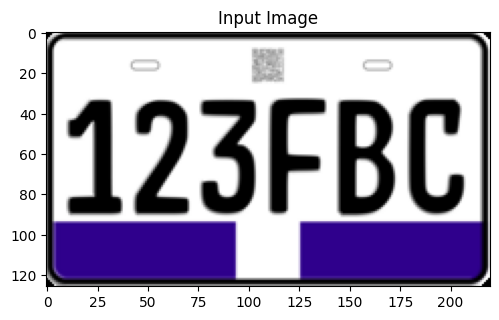

In [ ]:
# Let's load a simple image license plate image
image = cv2.imread('LP.png')
imshow('Input Image', image)

#### **Applying cv2.findContours()**

```cv2.findContours(image, Retrieval Mode, Approximation Method)```

**Retrieval Modes**
- **RETR_LIST** - Retrieves all the contours, but doesn't create any parent-child relationship. Parents and kids are equal under this rule, and they are just contours. ie they all belongs to same hierarchy level.
- **RETR_EXTERNAL** - eturns only extreme outer flags. All child contours are left behind.
- **RETR_CCOMP** - This flag retrieves all the contours and arranges them to a 2-level hierarchy. ie external contours of the object (ie its boundary) are placed in hierarchy-1. And the contours of holes inside object (if any) is placed in hierarchy-2. If any object inside it, its contour is placed again in hierarchy-1 only. And its hole in hierarchy-2 and so on.
- **RETR_TREE** -  It retrieves all the contours and creates a full family hierarchy list.

**Approximation Method Options**
- cv2.CHAIN_APPROX_NONE – Stores all the points along the line(inefficient!)
- cv2.CHAIN_APPROX_SIMPLE – Stores the end points of each line




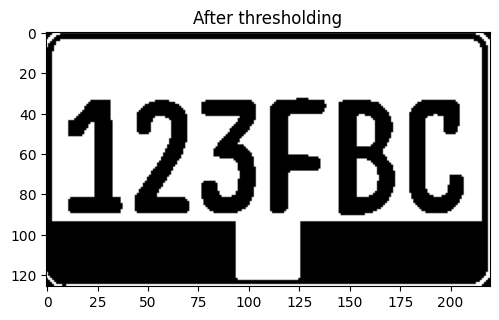

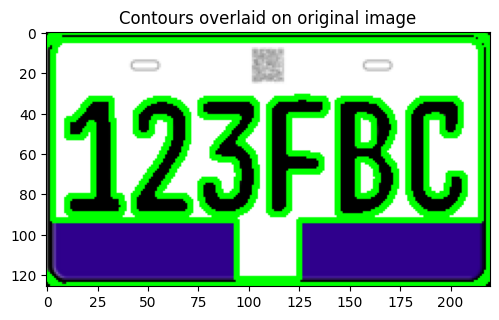

Number of Contours found = 11


In [ ]:
image = cv2.imread('LP.png')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Finding Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))


In [ ]:
contours[0]

array([[[  0, 119]],

       [[  0, 120]],

       [[  0, 121]],

       [[  1, 122]],

       [[  2, 123]],

       [[  3, 124]],

       [[  4, 125]],

       [[  5, 125]],

       [[  6, 125]],

       [[  7, 125]],

       [[  6, 125]],

       [[  5, 125]],

       [[  4, 124]],

       [[  3, 123]],

       [[  2, 122]],

       [[  1, 121]],

       [[  0, 120]]], dtype=int32)

#### **What happens if we don't threshold? Bad things..**

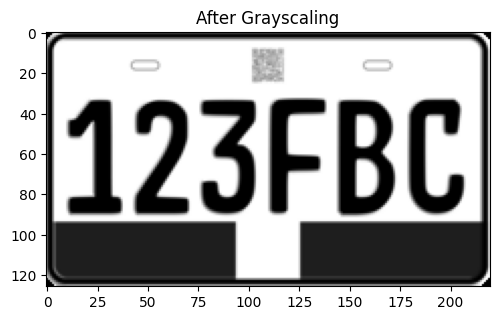

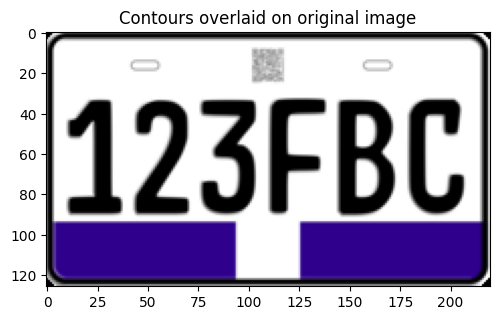

Number of Contours found = 25


In [ ]:
image = cv2.imread('LP.png')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imshow('After Grayscaling', gray)

# Finding Contours
contours, hierarchy = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
# cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))

# **NOTE: For findContours to work, the background has to be black and foreground (i.e. the text or objects)**

#### Otherwise you'll need to invert the image by using **cv2..bitwise_not(input_image)**

#### **We can use Canny Edges instead of Thresholding**

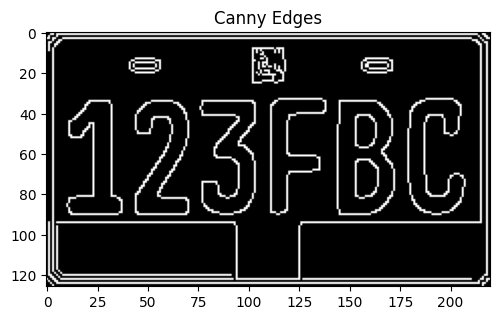

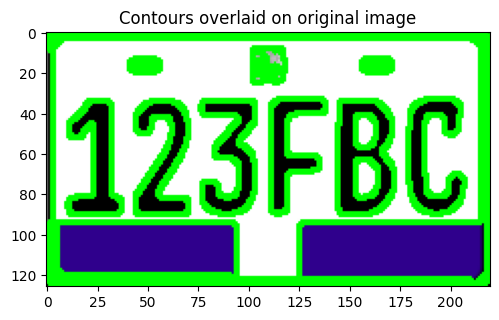

Number of Contours found = 37


In [ ]:
image = cv2.imread('LP.png')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Canny Edges
edged = cv2.Canny(gray, 30, 200)
imshow('Canny Edges', edged)

# Finding Contours
contours, hierarchy = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))


## **Remember these Countouring Steps**

1. Grayscale
2. Threshold or Canny Edge Detection to Binarize image

**Note:** Blurring before Step 2 is recommended to remove noisy contours

# **Retreival Modes**

Official Doc - https://docs.opencv.org/master/d9/d8b/tutorial_py_contours_hierarchy.html

**Hierachry**

This array stores 4 values for each contour:
- First term is the index of the Next contour
- Second term is the index of the Previous contour
- Third term is the index of the parent contour
- Forth term is the index of the child contour

### **RETR_LIST**
Retrieves all the contours, but doesn't create any parent-child relationship. Parents and kids are equal under this rule, and they are just contours. ie they all belongs to same hierarchy level.

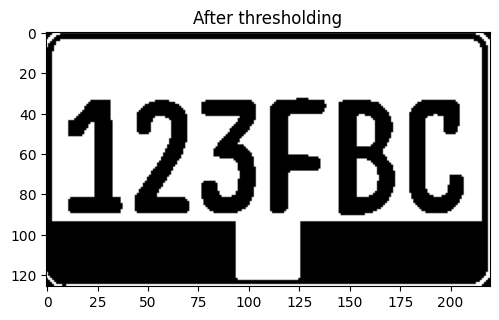

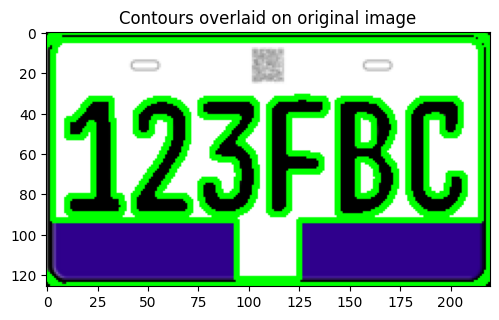

Number of Contours found = 11
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [-1  9 -1 -1]]]


In [ ]:
image = cv2.imread('LP.png')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))
print(hierarchy)

### **RETR_EXTERNAL**

Returns only extreme outer flags. All child contours are left behind.

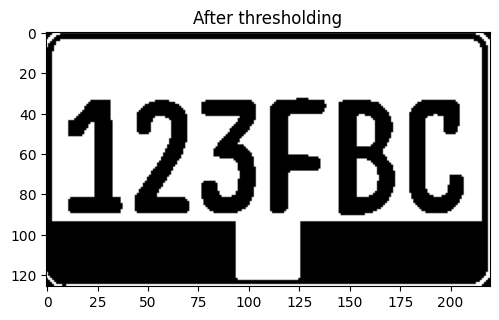

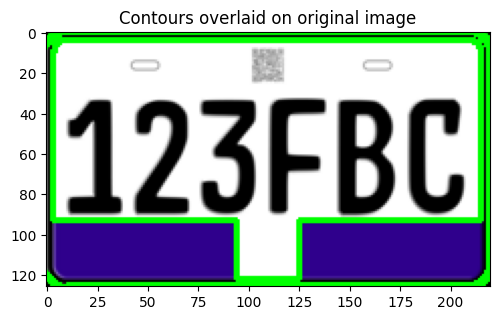

Number of Contours found = 3
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [-1  1 -1 -1]]]


In [ ]:
image = cv2.imread('LP.png')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image, size = 10)

print("Number of Contours found = " + str(len(contours)))
print(hierarchy)

### **RETR_CCOMP**

Retrieves all the contours and arranges them to a 2-level hierarchy. ie external contours of the object (ie its boundary) are placed in hierarchy-1. And the contours of holes inside object (if any) is placed in hierarchy-2. If any object inside it, its contour is placed again in hierarchy-1 only. And its hole in hierarchy-2 and so on.

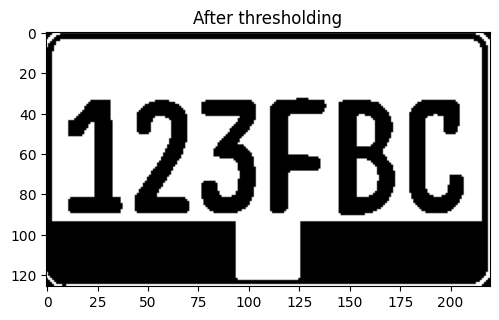

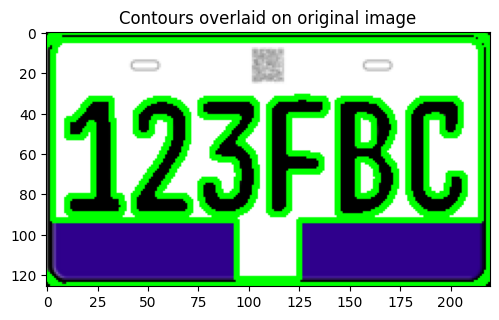

Number of Contours found = 11
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [10  2  4 -1]
  [ 5 -1 -1  3]
  [ 6  4 -1  3]
  [ 7  5 -1  3]
  [ 8  6 -1  3]
  [ 9  7 -1  3]
  [-1  8 -1  3]
  [-1  3 -1 -1]]]


In [ ]:
image = cv2.imread('LP.png')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))
print(hierarchy)

### **RETR_TREE**
It retrieves all the contours and creates a full family hierarchy list.

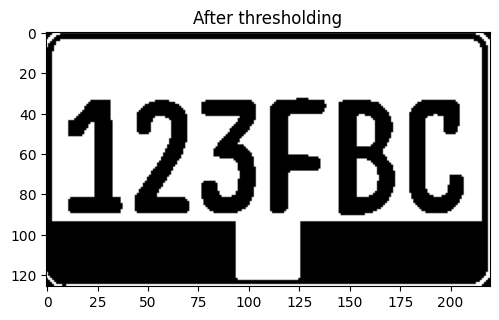

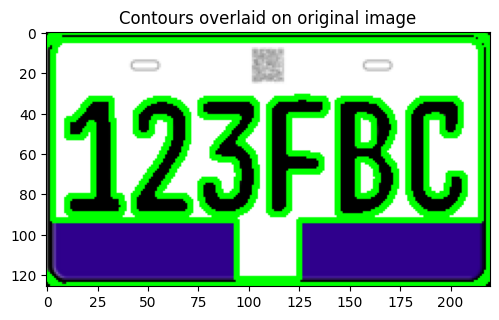

Number of Contours found = 11
[[[ 1 -1 -1 -1]
  [10  0  2 -1]
  [ 3 -1 -1  1]
  [ 6  2  4  1]
  [ 5 -1 -1  3]
  [-1  4 -1  3]
  [ 7  3 -1  1]
  [ 8  6 -1  1]
  [ 9  7 -1  1]
  [-1  8 -1  1]
  [-1  1 -1 -1]]]


In [ ]:
image = cv2.imread('LP.png')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))
print(hierarchy)

## **Contouring Modes**

#### **CHAIN_APPROX_NONE**

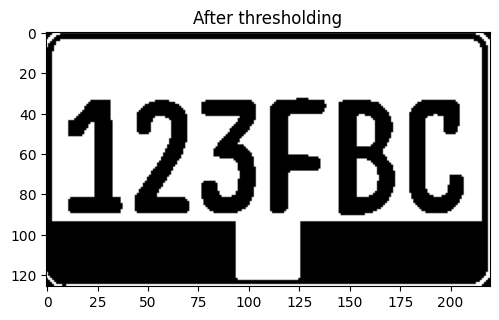

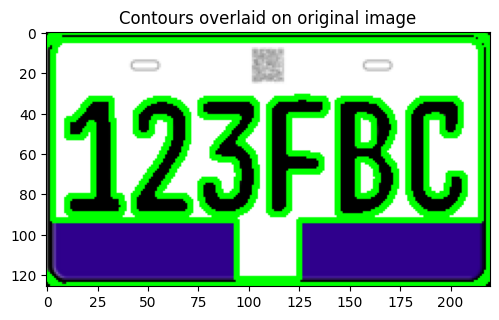

Number of Contours found = 11
17
650
204
149
47
40
204
190
184
183
1090


In [ ]:
image = cv2.imread('LP.png')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))
for c in contours:
  print(len(c))


#### **CHAIN_APPROX_SIMPLE**

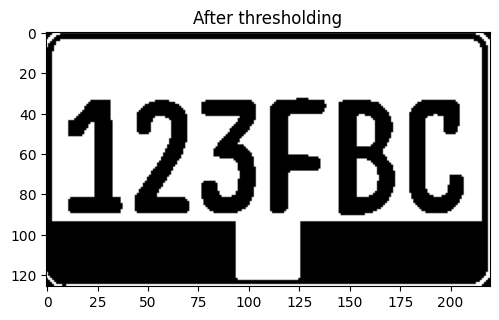

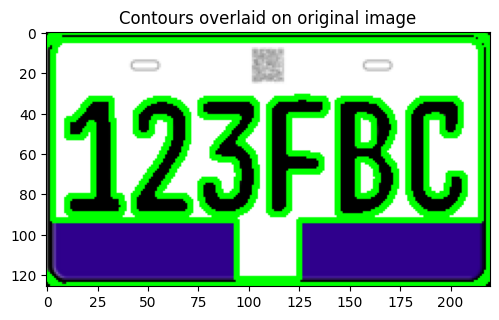

Number of Contours found = 11
6
23
53
42
14
9
73
75
33
29
24


In [ ]:
image = cv2.imread('LP.png')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))
for c in contours:
  print(len(c))

In [ ]:
import pandas as pd

# Misol dataframe
df = pd.DataFrame({
    'stream': ['Computer Vision', 'Artificial Intelligence', 'Machine Learning', 'Deep Learning']
})

# 1-usul: Lambda function orqali
df['abbreviation'] = df['stream'].apply(lambda x: ''.join(word[0] for word in x.split()))

# 2-usul: List comprehension orqali
df['abbreviation'] = df['stream'].apply(lambda x: ''.join([word[0] for word in x.split()]))

# 3-usul: Regular expression (regex) orqali
import re
df['abbreviation'] = df['stream'].apply(lambda x: ''.join(re.findall(r'(?=\S)[A-Z]', x)))

In [ ]:
df.stream

,stream
0,Computer Vision
1,Artificial Intelligence
2,Machine Learning
3,Deep Learning
